In [5]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

from AQ_Data_preprocessing import lade_aver_SO2
daily_averages_SO2 = lade_aver_SO2()

from AQ_Data_preprocessing import lade_aver_month_SO2
monthly_averages_SO2 = lade_aver_month_SO2()

In [6]:
df = monthly_averages_SO2

# Area chart
fig = px.area(df, x='Start', y='Value', title='Area Chart')
df["Value"] = pd.to_numeric(df["Value"])
df.fillna(1, inplace=True)

# Trendline (lineare Regression)
df['StartNumeric'] = pd.to_datetime(df['Start']).view("int64") / 10**9
slope, intercept = np.polyfit(df['StartNumeric'], df['Value'], 1)

df['Trend'] = intercept + slope * df['StartNumeric']

fig.add_scatter(x=df['Start'], y=df['Trend'], mode='lines', name='Trendlinie')

fig.show()

In [7]:
df["Value"] = pd.to_numeric(df["Value"])
df['Start'] = pd.to_datetime(df['Start'])

# Group the data by year
df['Year'] = df['Start'].dt.year

fig = px.area(df, x='Start', y='Value', title='Area Chart')

# Calculate and add the trend line for each year
for year in df['Year'].unique():
    yearly_data = df[df['Year'] == year]
    
    yearly_data['StartNumeric'] = yearly_data['Start'].view("int64") / 10**9
    
    # Calculate the linear regression for the year
    slope, intercept = np.polyfit(yearly_data['StartNumeric'], yearly_data['Value'], 1)
    
    # Calculation of the trend line values
    yearly_data['Trend'] = intercept + slope * yearly_data['StartNumeric']
    
    fig.add_scatter(x=yearly_data['Start'], y=yearly_data['Trend'], mode='lines', name=f'Trendlinie {year}')

fig.show()

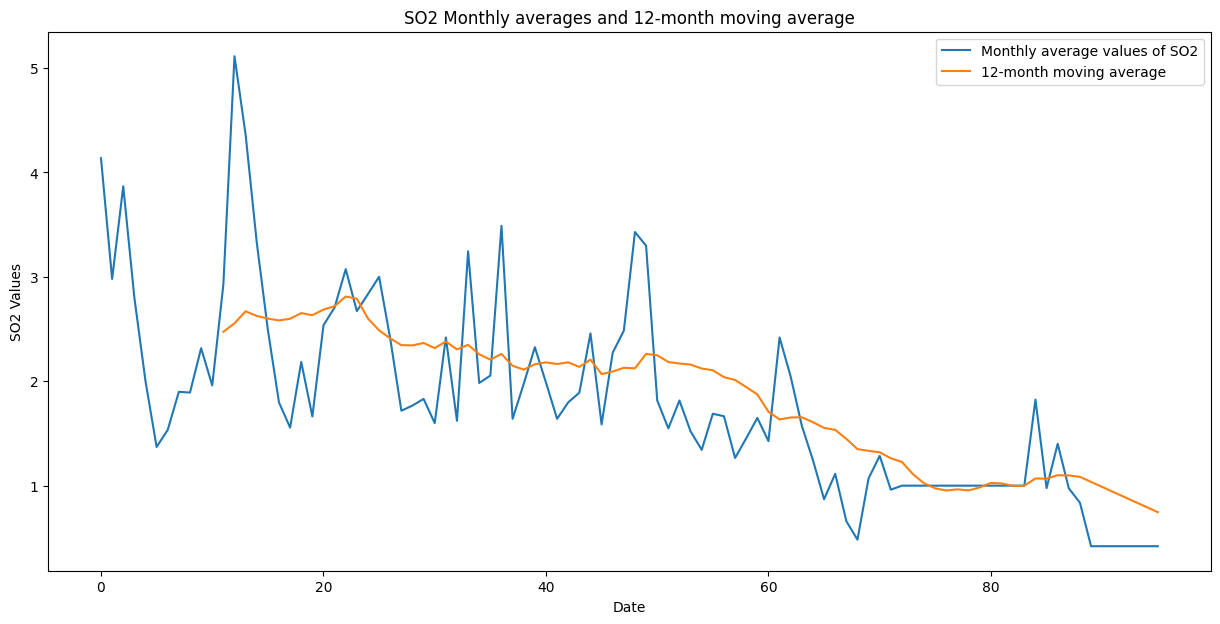

In [12]:
# Moving average

plt.figure(figsize=(15, 7))

plt.plot(monthly_averages_SO2.index, monthly_averages_SO2['Value'], label='Monthly average values of SO2')


rolling_window = 12 #  Example of a 12-month
plt.plot(monthly_averages_SO2['Value'].rolling(window=rolling_window).mean(), label='12-month moving average')

plt.legend()
plt.title('SO2 Monthly averages and 12-month moving average')
plt.xlabel('Date')
plt.ylabel('SO2 Values')

plt.show()


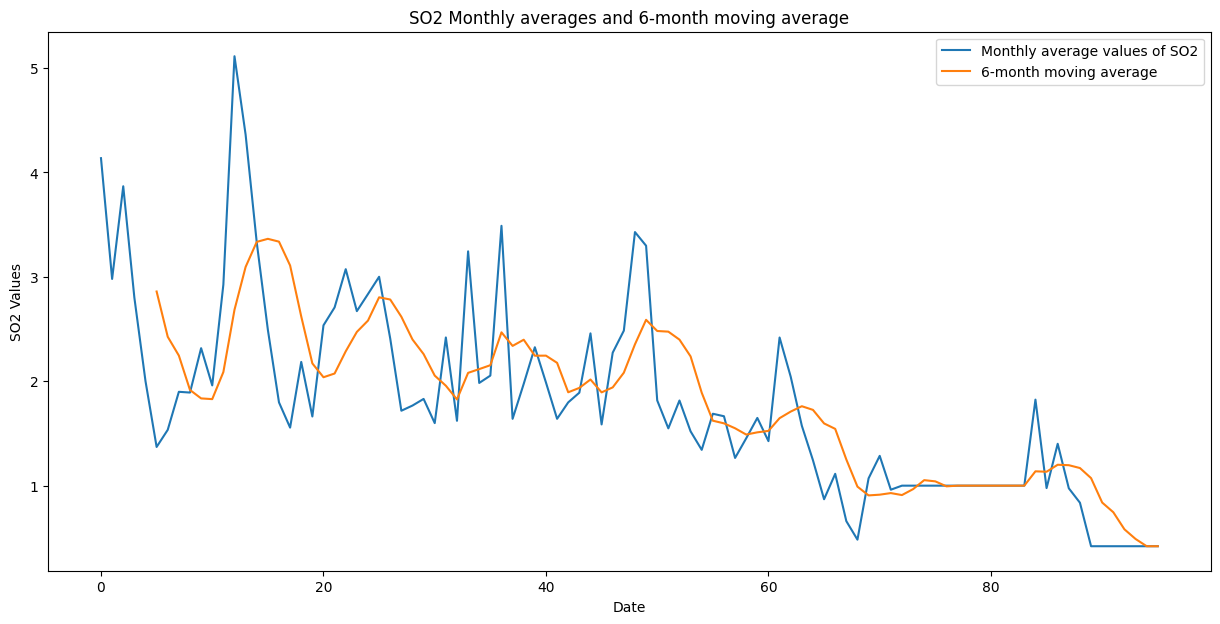

In [13]:
plt.figure(figsize=(15, 7))

plt.plot(monthly_averages_SO2.index, monthly_averages_SO2['Value'], label='Monthly average values of SO2')

rolling_window = 6  # Example of a 6-month
plt.plot(monthly_averages_SO2['Value'].rolling(window=rolling_window).mean(), label='6-month moving average')

plt.legend()
plt.title('SO2 Monthly averages and 6-month moving average')
plt.xlabel('Date')
plt.ylabel('SO2 Values')

plt.show()